In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [44]:
def get_peak_to_peak(folder):
    files = os.listdir(folder)
    mi = -1
    ma = -1
    for f in files[0:1]:
        data = np.loadtxt(folder+'/'+f, skiprows=3)
        f_max = np.max(data[:,1])
        f_min = np.min(data[:,1])
        if mi == -1 or f_min < mi:
            mi = f_min
        if ma != -1 or f_max > ma:
            ma = f_max
    return ma-mi

In [63]:
min_OD = 0.04
max_OD = 2
angle_range=270
def angle_to_trans(angle):
    OD = angle/angle_range*(max_OD-min_OD) + min_OD
    return pow(10, -2*OD)

In [64]:
data_dir = "Wheel of doom"
sub_folders = os.listdir(data_dir)
sort_buffer = sub_folders[:-1]
sort_buffer.sort(key=float)
sub_folders = [sub_folders[-1]]+sort_buffer
ampls = []
for s in sub_folders:
    ampls.append(get_peak_to_peak(data_dir+'/'+s))

Text(0, 0.5, 'Interference amplitude')

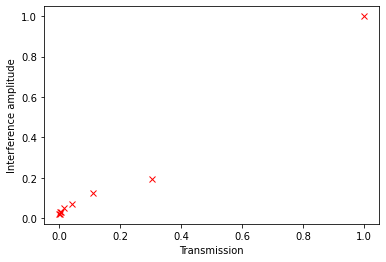

In [67]:
transmissions = [1] + [angle_to_trans(int(a)) for a in sub_folders[1:]]

plt.plot(transmissions, ampls/ampls[0], 'rx')
# plt.yscale("log")
plt.xlabel("Transmission")
plt.ylabel("Interference amplitude")